<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_08_diferenciacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculo de derivadas


## Diferencias finitas de primer orden
El método de diferencias finitas aproxima derivadas numéricamente.


- Aproximación de primer orden hacia adelante:

\begin{equation}
      f'(x_k) \approx \frac{f(x_{k+1}) - f(x_k)}{h}
\end{equation}

- Aproximación de primer orden hacia atrás:

\begin{equation}
      f'(x_k) \approx \frac{f(x_k) - f(x_{k-1})}{h}
\end{equation}



\begin{equation}
\text{Error} = \frac{h}{2} f''(\xi)
\end{equation}

donde $x$ está entre $x_k$ y $x_{k+1}$.
## Diferencias finitas de segundo orden, diferencia central


Utilizando la fórmula de Taylor de segundo grado:
\begin{equation}
f(x) = f(x_k) + f'(x_k)(x - x_k) + \frac{f''(x_k)}{2}(x - x_k)^2 + R_2
\end{equation}

Evaluando en $x = x_{k+1} y x = x_{k-1}$:
\begin{equation}
f(x_{k+1}) = f(x_k) + f'(x_k)h + \frac{f''(x_k)}{2}h^2 + O(h^3)
\end{equation}

\begin{equation}
f(x_{k-1}) = f(x_k) - f'(x_k)h + \frac{f''(x_k)}{2}h^2 + O(h^3)
\end{equation}

Restando estas ecuaciones y despejando $f'(x_k)$:

\begin{equation}
f'(x_k) \approx \frac{f(x_{k+1}) - f(x_{k-1})}{2h}
\end{equation}




El error en la la aproximación de segundo orden es:
\begin{equation}
f'(x_k) \approx \frac{f(x_{k+1}) - f(x_{k-1})}{2h}
\end{equation}

El error de truncamiento es:
\begin{equation}
\text{Error} = \frac{h^2}{6} f'''(\xi)
\end{equation}

donde $\xi$ está entre $x_{k-1}$ y $x_{k+1}$.


# Actividad

1. Construya una función que permita calcular la derivada de una funcion empleando el metodo de diferencias centrales para aproximar el cálculo de la derivada con la función:

$y=e^{x^2}\sin x $

Compruebe  su solución empleando la derivada de sympy.

Analice que  pasa con la derivada cuando varia el valor de h.


2. Construya una función que permita calcular el metodo de diferencias centrales derivada para los siguientes puntos experimentales, emplee una pandas.



3. El potencial eléctrico de un anillo de radio R, en la parte superior z del anillo viene dado por:


\begin{equation}
V = \frac{kq_{tot}z}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para z>0 y R=0.1mm. Reescale el problema en unidades de $kq_{top}$ empleando:

1. La librearia sympy.

2. Calcular el campo en el punto  $z = 0.1mm$ empleando el metodo np.grad

3. Calcular el campo para diferentes valores de z con z>0,,  empleando np.grad Construya un gráfico de E vs z.


In [1]:
import numpy as np
import matplotlib.pylab as plt
import sympy as sp
import pandas as pd
from scipy.interpolate import CubicSpline

1. Construya una función que permita calcular la derivada de una funcion empleando el metodo de diferencias centrales para aproximar el cálculo de la derivada con la función:

$y=e^{x^2}\sin x $

Compruebe  su solución empleando la derivada de sympy.

Analice que  pasa con la derivada cuando varia el valor de h.

In [2]:
def diff(fun,x,h):
  derivada = (fun(x+h)-fun(x-h))/(2*h)
  return derivada

In [3]:
fun = lambda x: np.exp(x**2)*np.sin(x)
x = np.linspace(-1,1,100)
derivada = diff(fun,x,h=1e-2)

In [4]:
y = sp.symbols("y")
fun_sp = lambda y: sp.exp(y**2)*sp.sin(y)
d_fun_sp = sp.diff(fun_sp(y),y,1)
diff1 = sp.lambdify(y,d_fun_sp,"numpy")
derivada1 = diff1(x)

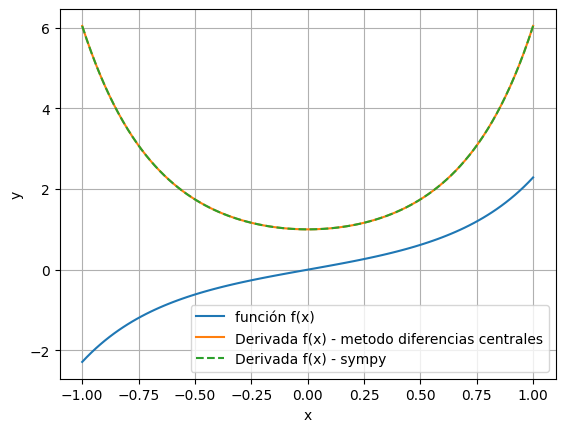

In [5]:
plt.figure()
plt.plot(x, fun(x),label="función f(x)")
plt.plot(x,derivada,label="Derivada f(x) - metodo diferencias centrales")
plt.plot(x,derivada1,"--",label="Derivada f(x) - sympy")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

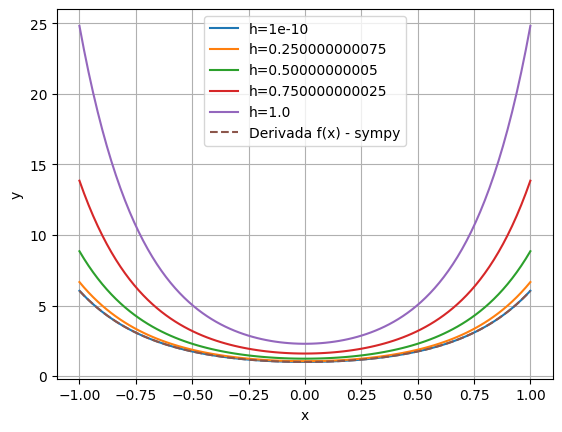

In [6]:
# Veamos que pasa a medida que aumenta el valor de h

h = np.linspace(1e-10,1,5)
for i in h:
  d = diff(fun,x,i)
  plt.plot(x, d, label="h={}".format(i))
plt.plot(x,derivada1,"--",label="Derivada f(x) - sympy")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()


Podemos observar que mientras el h sea mas pequeño el metodo de diferencias centrales nos va a acercar más a la derivada hecha con sympy, es decir, podemos afirmar que el error del metodo será menor, esto es congruente con la definición de la derivada con el limite cuando h tiende a 0.

2. Construya una función que permita calcular el metodo de diferencias centrales derivada para los siguientes puntos experimentales, emplee una pandas.



In [7]:
link = "https://raw.githubusercontent.com/hernansalinas/autogradesMetodosComputacionales/main/Dataset/datos_pendulo.csv"
df = pd.read_csv(link)

In [8]:
# Utilizamos interpolación para tener un polinomio que pase por todos los puntos dados para así poder aplicar el metodo de diferencias centrales.

x = np.array(df["Tiempo[ms]"])
y = np.array(df["AnguloRad"])
cs = CubicSpline(x,y)

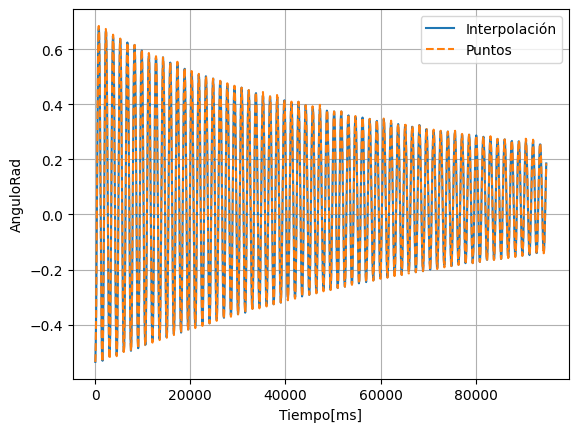

In [24]:
x_ = np.linspace(x[0],x[-1],1000)
plt.plot(x_, cs(x_),label="Interpolación")
plt.plot(x,y,"--",label="Puntos")
plt.xlabel("Tiempo[ms]")
plt.ylabel("AnguloRad")
plt.legend()
plt.grid()
plt.show()

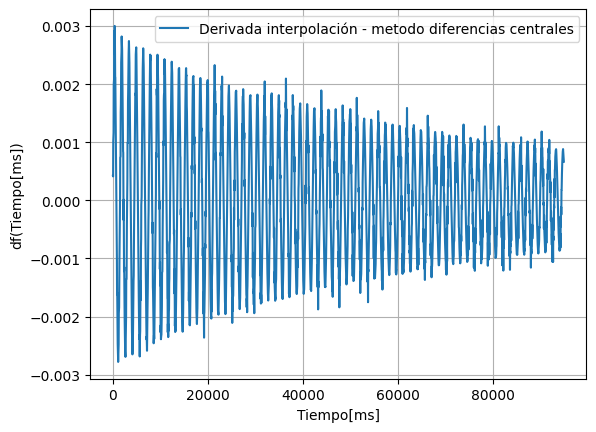

In [27]:
derivada2 = diff(cs,x,h=1e-10)
plt.plot(x,derivada2,label="Derivada interpolación - metodo diferencias centrales")
plt.xlabel("Tiempo[ms]")
plt.ylabel("df(Tiempo[ms])")
plt.legend()
plt.grid()
plt.show()

3. El potencial eléctrico de un anillo de radio R, en la parte superior z del anillo viene dado por:


\begin{equation}
V = \frac{kq_{tot}}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para z>0 y R=0.1mm. Reescale el problema en unidades de $kq_{top}$ empleando:

1. La librearia sympy.

2. Calcular el campo en el punto  $z = 0.1mm$ empleando el metodo np.grad

3. Calcular el campo para diferentes valores de z con z>0,,  empleando np.grad Construya un gráfico de E vs z.


Campo eléctrico reescalado en unidades de kq_top:
z/(R**2 + z**2)**(3/2)

Campo eléctrico en z = 0.1 mm: 3.181980515339464e+17 N/C


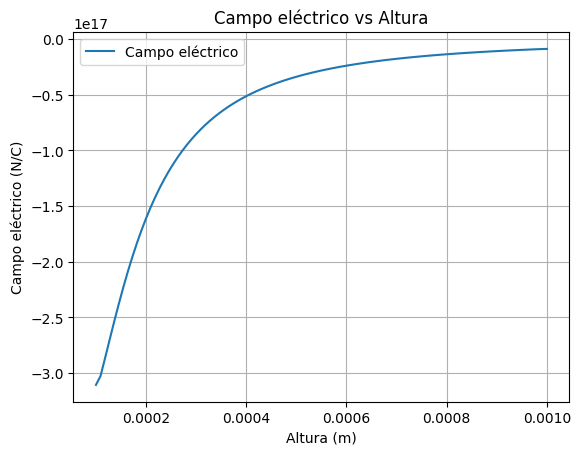

In [28]:
z, k, q_tot, R = sp.symbols('z k q_tot R')
V = k * q_tot / sp.sqrt(z**2 + R**2)

E = -sp.diff(V, z)

# Reescalar el problema en unidades de kq_top
E_reescalado = E / (k * q_tot)

print("Campo eléctrico reescalado en unidades de kq_top:")
print(E_reescalado)

R_value = 0.1e-3

z_point = 0.1e-3
E_punto = E.subs({z: z_point, R: R_value, k: 9e9, q_tot: 1})
E_punto_valor = float(E_punto)

print("\nCampo eléctrico en z = 0.1 mm:", E_punto_valor, "N/C")


z_values = np.linspace(0.1e-3, 1e-3, 100)  # Valores de z desde 0.1 mm hasta 1 mm

# Evaluar la expresión de SymPy en cada valor de z y luego calcular el gradiente
V_values = [V.subs({z: z_val, R: R_value, k: 9e9, q_tot: 1}) for z_val in z_values]
E_values = np.gradient(V_values, z_values)

# Graficar E vs z
plt.plot(z_values, E_values, label='Campo eléctrico')
plt.xlabel('Altura (m)')
plt.ylabel('Campo eléctrico (N/C)')
plt.title('Campo eléctrico vs Altura')
plt.legend()
plt.grid(True)
plt.show()
